<a href="https://it-omscholing.nl/locaties/hogeschool-rotterdam/">
<div>
<a><img src='pics/banner.PNG'/></a>
</div>
<div>
<a href=''><img src='pics/miw.PNG'/></a>
<em>Author: Jeroen Boogaard</em>
</div>
</a>

<h1>Practicum Computer Vision</h1>

<h2>Imports<h2>

In [125]:
from PIL import Image
import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
from sklearn.model_selection import train_test_split
import random
import requests
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import datasets, layers, models
import zipfile

**Gebruik een <i>environment variable</i> voor het instellen van het logleven van TensorFlow**

In [126]:
os.environ['TF_CPP_MIN_LEVEL'] = '2'

<h2>Data Collection</h2>

<h3>Data downloaden</h3>

In [127]:
dataUrl = requests.get("http://madm.dfki.de/files/sentinel/EuroSAT.zip")
dataFile = zipfile.ZipFile(io.BytesIO(dataUrl.content))

In [128]:
# get file names
txtFiles = list()

for txtFile in dataFile.namelist():
    txtFiles.append(txtFile)
    # print(txtFile)

<h3>Data filteren</h3>

In [129]:
txtFiles = [x for x in txtFiles if ".jpg" in x]

<h3>Data inlezen</h3>

In [130]:
imageObjects = np.zeros([len(txtFiles), 64, 64, 3])

i = 0

for pic in txtFiles:
  imageObjects[i] = np.asarray(Image.open(dataFile.open(pic))).astype('uint8')/255
  i += 1
    
# print(imageObjects[0])    

**Gebruik de bestandsnamen voor het verkrijgen van de labels**

In [131]:
imageLabels = np.empty(len(txtFiles), dtype = 'S20')

i = 0

for label in txtFiles:
    txtFiles[i] = label.split('/')[1]
    i += 1
    
# print(txtFiles[0])    


In [132]:
# change them to integers in alphabetical order
labelNames, labelNumbers = np.unique(txtFiles, return_inverse=True)
labelDict = dict(zip(np.unique(labelNumbers), labelNames))
# print(labelNames)
# print(labelNumbers)

np.array(np.unique(labelNumbers, return_counts=True)).T

array([[   0, 3000],
       [   1, 3000],
       [   2, 3000],
       [   3, 2500],
       [   4, 2500],
       [   5, 2000],
       [   6, 2500],
       [   7, 3000],
       [   8, 2500],
       [   9, 3000]])

<h3>Data splitten</h3>

In [158]:
trainSet, testSet, trainLabels, testLabels = train_test_split(imageObjects, labelNumbers, stratify = labelNumbers, train_size = 0.75, random_state=42)
print(trainSet.shape)
nrOfImages = len(trainSet)
print(nrOfImages)

(20250, 64, 64, 3)
20250


<h3>Data inspecteren</h3>

In [134]:
def inspectData():
    
    plt.figure(figsize=(10,10))
    
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        number = i
        plt.imshow(trainSet[number])
        plt.xlabel(labelNames[trainLabels[number]]) 
    
    plt.show()

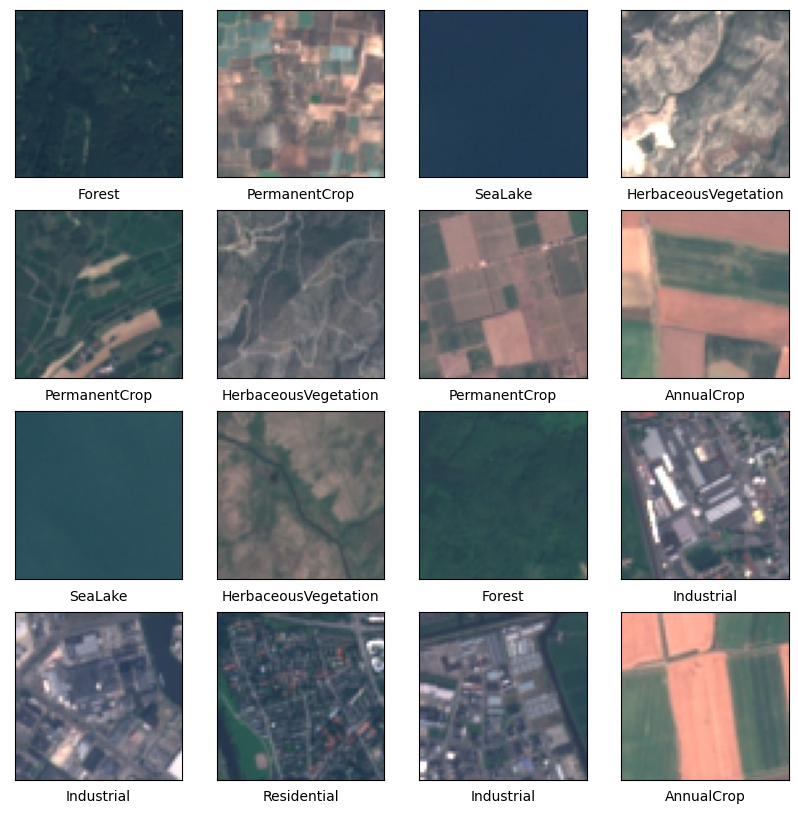

In [135]:
inspectData()    

<h2>Maak een model</h2>

<h3>Definieer de netwerktopologie</h3>

<h3>Exercise 1</h3>
<p>
    Vul de netwerktopologie tot een bruikbaar Neural Netwerk onstaat.
</p>

In [165]:
num_classes = len(labelNames)

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 8, 8, 64)        

<h3>Definieer de trainparameters</h3>

In [138]:
lossFunction = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
gdAlgorithm = keras.optimizers.Adam(learning_rate=0.001)
nrOfEpochs = 5

<h3>Train het model</h3>

In [166]:
model.compile(optimizer=gdAlgorithm, loss=lossFunction, metrics="accuracy")
history = model.fit(trainSet, trainLabels, epochs=nrOfEpochs, batch_size=64, verbose=2)

Epoch 1/5
317/317 - 30s - loss: 1.3545 - accuracy: 0.4906 - 30s/epoch - 96ms/step
Epoch 2/5
317/317 - 30s - loss: 0.8865 - accuracy: 0.6790 - 30s/epoch - 95ms/step
Epoch 3/5
317/317 - 30s - loss: 0.7137 - accuracy: 0.7450 - 30s/epoch - 96ms/step
Epoch 4/5
317/317 - 30s - loss: 0.6151 - accuracy: 0.7787 - 30s/epoch - 95ms/step
Epoch 5/5
317/317 - 30s - loss: 0.5625 - accuracy: 0.7974 - 30s/epoch - 96ms/step


<h3>Test het model</h3>

In [ ]:
model.compile(optimizer=gdAlgorithm, loss=lossFunction, metrics="accuracy")
history_test = model.fit(testSet, testLabels, epochs=nrOfEpochs, batch_size=64, verbose=2)


<h3>Exercise 2</h3>
<p>
    Test het Neural Netwerk met de testset en laat zien of het in staat is de juiste class te vinden.
</p>

In [ ]:
trainSet, testSet, trainLabels, testLabels = train_test_split(imageObjects, labelNumbers, stratify = labelNumbers, train_size = 0.75, random_state=42)
print(trainSet.shape)
nrOfImages = len(trainSet)
print(nrOfImages)

Forest


TypeError: 'method' object is not subscriptable

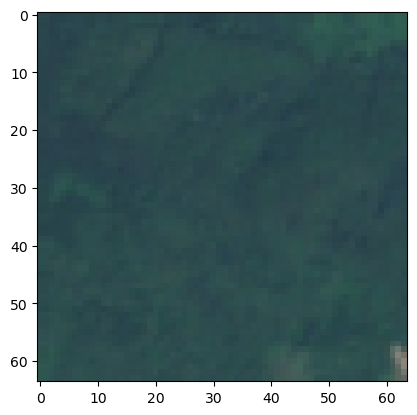

In [170]:
#hier kies je welke index je iets mee wilt
i = 10

#dit is het plaatje van index i
img = trainSet[i]

# print de label naam van index i
print(labelNames[trainLabels[i]])

#laat plaatje zien
plt.imshow(img)

#iets met predict doen

In [ ]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

numpy

In [157]:
#get predictions
pred = model.predict(testSet, batch_size=16)
pred = np.argmax(pred, axis=-1)

#original labels
labels = np.argmax(testLabels,axis=-1)
from sklearn.metrics import classification_report
print(classification_report(labels, pred))

422/422 [==============================] - 7s 17ms/step


TypeError: Singleton array 0 cannot be considered a valid collection.

211/211 - 5s - loss: 0.2121 - accuracy: 0.9231 - 5s/epoch - 22ms/step


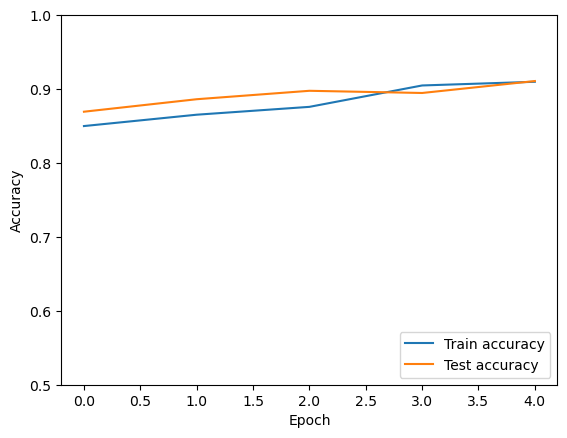

In [148]:
# plt.plot(history.history['accuracy'], label='Train accuracy')
# plt.plot(history_test.history['accuracy'], label = 'Test accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
# plt.legend(loc='lower right')

# test_loss, test_acc = model.evaluate(testSet,  testLabels, verbose=2)